In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import math as mt
import seaborn as sns
from scipy.stats import norm

In [4]:
data = pd.read_csv(r"student-por.csv", sep=';')

In [5]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [87]:
female=data[data['sex']=='F'].sex.count()
male=data[data['sex']=='M'].sex.count()
male

266

In [151]:
female=data[data['famsize']=='LE3'].sex.count()
male=data[data['famsize']=='GT3'].sex.count()
print(female,male)

192 457


In [152]:
female=data[data['Pstatus']=='T'].sex.count()
male=data[data['Pstatus']=='A'].sex.count()
print(female,male)

569 80


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#correlation coefficient between Study time ad Failures
x=data.studytime
y=data.failures
s=np.mean(x)
f=np.mean(y)
n=len(x)
r=np.inner((x-s),(y-f))/mt.sqrt(sum((x-s)**2)*sum((y-f)**2)) 
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with standard error SE:')
print(SE)

Correlation coefficient r:
-0.14744054515158145
with standard error SE:
0.03845941964984769


In [9]:
r=np.corrcoef(x, y)[1,0] #correlation coefficient

In [79]:
a=data.groupby(['studytime','failures']).count()
#sns.scatterplot(data=data, x="studytime", y="failures",size=a)


ModuleNotFoundError: No module named 'plotly'

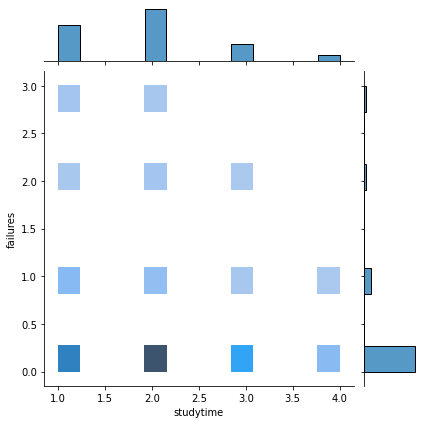

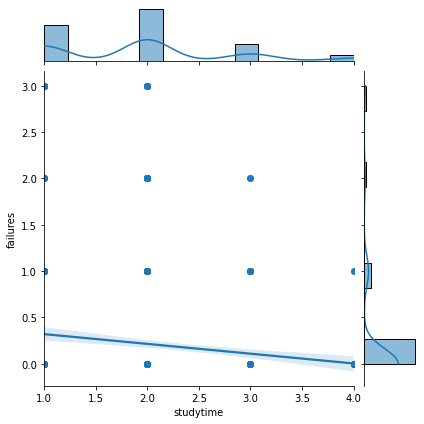

In [12]:
kdeplot=sns.jointplot(data=data, x="studytime", y="failures", kind="hist")
sns.jointplot(data=data, x="studytime", y="failures", kind="reg")


Text(33.0, 0.5, 'Failures')

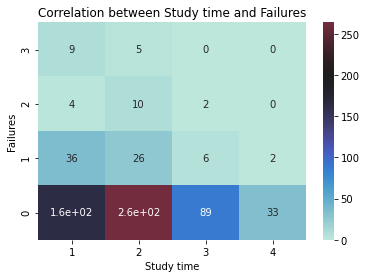

In [13]:
a=data.groupby(['studytime','failures']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=264,center=200,annot=True)
plt.title('Correlation between Study time and Failures')
plt.xlabel('Study time')
plt.ylabel('Failures')


Correlation coefficient r:
0.249788689998863
with Standard error SE:
0.036861080126113825


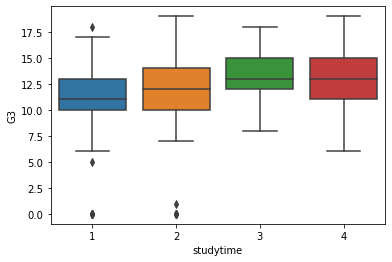

In [65]:
#correlation coefficient between Study time and Final Grade (=G3)
x=data.studytime
y=data.G3
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
ax = sns.boxplot(x="studytime", y="G3", data=data)
#we can see that the G3 mean for each studytime value grows as the studytime value gets higher

Text(33.0, 0.5, 'Final grade')

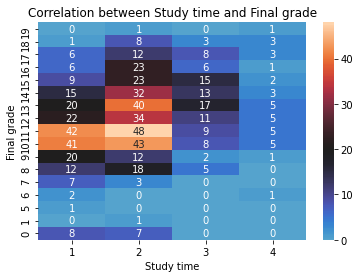

In [15]:
a=data.groupby(['studytime','G3']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=48,center=20,annot=True) #cmap="YlGnBu"
plt.title('Correlation between Study time and Final grade')
plt.xlabel('Study time')
plt.ylabel('Final grade')

Correlation coefficient r:
0.06336112772983048
with Standard error SE:
0.03915622520852588


Text(0, 0.5, 'Final grades')

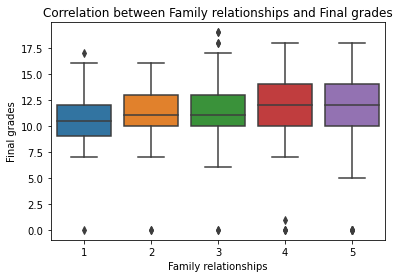

In [67]:
#correlation coefficient between Families relationship and Final Grade (=G3)
x=data.famrel
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
ax = sns.boxplot(x="famrel", y="G3", data=data)
plt.title('Correlation between Family relationships and Final grades')
plt.xlabel('Family relationships')
plt.ylabel('Final grades')
#the correlation coefficient is really low

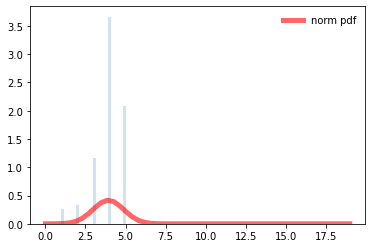

In [22]:
a='F'
y=data[data['sex']=='F'].G3
mu=np.mean(x)
sigma=np.std(x)
norm()
fig, ax = plt.subplots(1, 1)
rv = norm()
ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=mu, scale=sigma),
       'r-', lw=5, alpha=0.6, label='norm pdf')
#ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(x, bins=30,density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

Text(0.5, 0, 'First Grades')

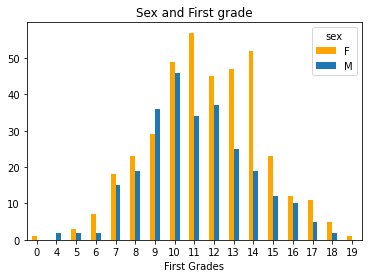

In [26]:
#correlation coefficient between Sex and First Grade (=G1)
#[0,1]=woman ,[1,0]=man
x=data.sex
#ax = sns.barplot(x="sex", y="G3", data=data)
data.groupby(['G1', 'sex']).size().unstack().plot.bar(rot=0, color=['orange','tab:blue'])
plt.title('Sex and First grade')
plt.xlabel('First Grades')

Text(0.5, 0, 'Second Grades')

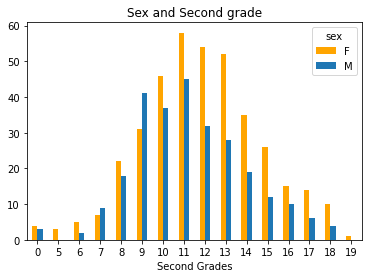

In [27]:
#correlation coefficient between Sex and Second Grade (=G2)
x=data.sex
#ax = sns.barplot(x="sex", y="G3", data=data)
data.groupby(['G2', 'sex']).size().unstack().plot.bar(rot=0,color=['orange','tab:blue'])
plt.title('Sex and Second grade')
plt.xlabel('Second Grades')

Text(0, 0.5, 'Total')

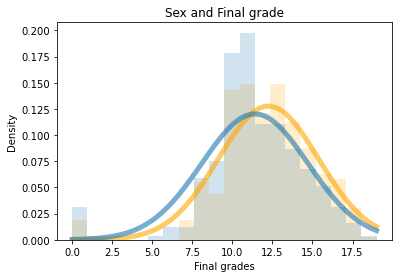

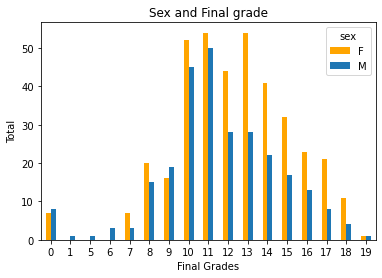

In [120]:
#correlation coefficient between Sex and Final Grade (=G3)
#[0,1]=woman ,[1,0]=man
y=data[data['sex']=='M'].G3
muy=np.mean(y)
sigmay=np.std(y)
x=data[data['sex']=='F'].G3
mu=np.mean(x)
sigma=np.std(x)
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=mu, scale=sigma),
       'orange', lw=5, alpha=0.6, label='norm pdf')
ax.hist(x, bins=20,density=True, histtype='stepfilled', alpha=0.2,color='orange')
ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=muy, scale=sigmay),
       'tab:blue', lw=5, alpha=0.6, label='norm pdf')
ax.hist(y, bins=20,density=True, histtype='stepfilled', alpha=0.2)
plt.title('Sex and Final grade')
plt.xlabel('Final grades')
plt.ylabel('Density')
data.groupby(['G3', 'sex']).size().unstack().plot.bar(rot=0, color=['orange','tab:blue'])
plt.title('Sex and Final grade')
plt.xlabel('Final Grades')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

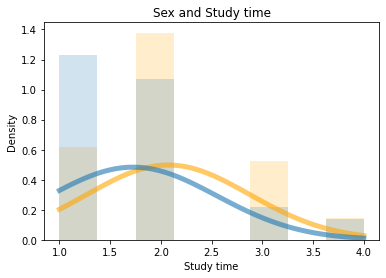

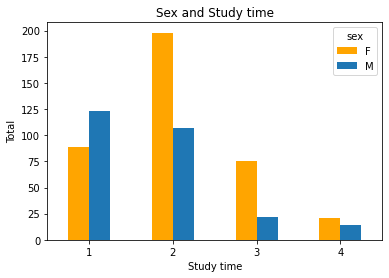

In [122]:
#correlation coefficient between Sex and Studytime 
y=data[data['sex']=='M'].studytime
muy=np.mean(y)
sigmay=np.std(y)
x=data[data['sex']=='F'].studytime
mu=np.mean(x)
sigma=np.std(x)
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(1,4), norm.pdf(np.linspace(1,4),loc=mu, scale=sigma),
       'orange', lw=5, alpha=0.6, label='norm pdf')
ax.hist(x, bins=8,density=True, histtype='stepfilled', alpha=0.2,color='orange')

ax.plot(np.linspace(1,4), norm.pdf(np.linspace(1,4),loc=muy, scale=sigmay),
       'tab:blue', lw=5, alpha=0.6, label='norm pdf')
ax.hist(y, bins=8,density=True, histtype='stepfilled', alpha=0.2)
plt.title('Sex and Study time')
plt.xlabel('Study time')
plt.ylabel('Density')
y=data.studytime
x=data.sex
data.groupby(['studytime', 'sex']).size().unstack().plot.bar(rot=0, color=['orange','tab:blue'])
plt.title('Sex and Study time')
plt.xlabel('Study time')
plt.ylabel('Total')

Correlation coefficient r:
-0.10650539063847875
with Standard error SE:
0.03886810169717053


Text(33.0, 0.5, 'Final grade')

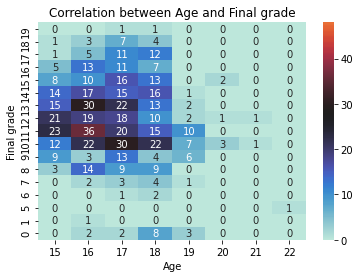

In [147]:
#correlation between age and Final grade
y=data.G3
x=data.age
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
a=data.groupby(['age','G3']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=48,center=28,annot=True) #cmap="YlGnBu"
plt.title('Correlation between Age and Final grade')
plt.xlabel('Age')
plt.ylabel('Final grade')

Text(33.0, 0.5, 'Final grade')

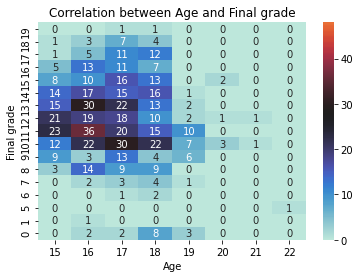

In [148]:
sns.heatmap(a,vmin=0,vmax=48,center=28,annot=True) #cmap="YlGnBu"
plt.title('Correlation between Age and Final grade')
plt.xlabel('Age')
plt.ylabel('Final grade')

Correlation coefficient r:
-0.1766188742096643
with Standard error SE:
0.03808768510032175


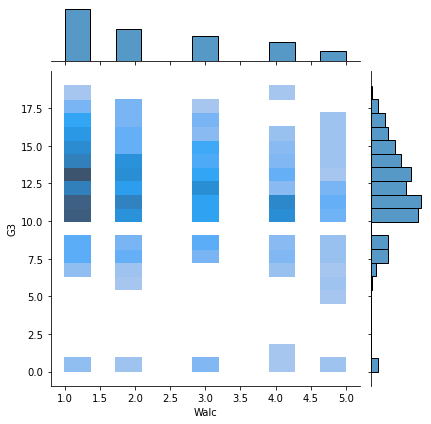

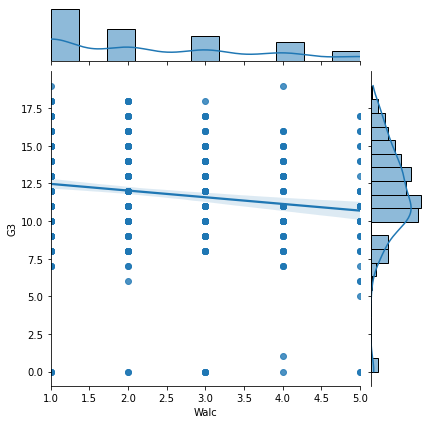

In [31]:
#correlation between Final Grade and Alcool weekendly consuption
x=data.G3
y=data.Walc
r=np.corrcoef(x, y)[1,0] #correlation coefficient
SE=(1-r**2)/mt.sqrt(n-2) #standard error
print('Correlation coefficient r:')
print(r)
print('with Standard error SE:')
print(SE)
sns.jointplot(data=data, x="Walc", y="G3", kind="hist")
sns.jointplot(data=data, x="Walc", y="G3", kind="reg")

In [ ]:
#fugli unici uniti/famiglia grande uniti-g3

Text(0, 0.5, 'Total')

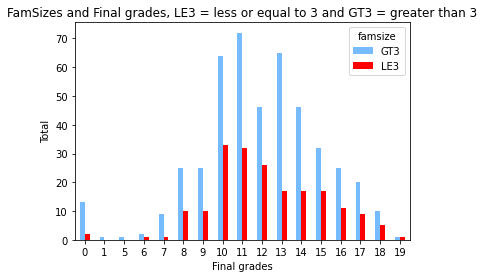

In [131]:
data.groupby(['G3', 'famsize']).size().unstack().plot.bar(rot=0, color=['xkcd:sky blue','red'])
plt.title('FamSizes and Final grades, LE3 = less or equal to 3 and GT3 = greater than 3')
plt.xlabel('Final grades')
plt.ylabel('Total')

Text(0, 0.5, 'Density')

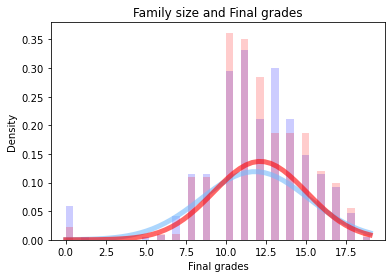

In [136]:
y=data[data['famsize']=='LE3'].G3
muy=np.mean(y)
sigmay=np.std(y)

x=data[data['famsize']=='GT3'].G3
mu=np.mean(x)
sigma=np.std(x)

fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=mu, scale=sigma),
       'xkcd:sky blue', lw=5, alpha=0.6, label='norm pdf')
ax.hist(x, bins=40,density=True, histtype='stepfilled', alpha=0.2,color='blue')

ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=muy, scale=sigmay),
       'red', lw=5, alpha=0.6, label='norm pdf')
ax.hist(y, bins=40,density=True, histtype='stepfilled', alpha=0.2,color='red')
plt.title('Family size and Final grades')
plt.xlabel('Final grades')
plt.ylabel('Density')

Text(0, 0.5, 'Total')

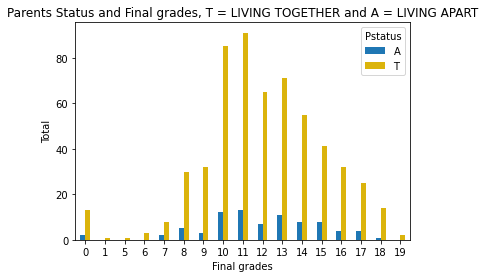

In [57]:
data.groupby(['G3','Pstatus']).size().unstack().plot.bar(rot=0, color=['tab:blue','xkcd:gold'])
plt.title('Parents Status and Final grades, T = LIVING TOGETHER and A = LIVING APART')
plt.xlabel('Final grades')
plt.ylabel('Total')

Text(0, 0.5, 'Density')

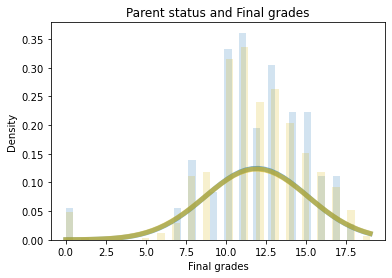

In [142]:
y=data[data['Pstatus']=='T'].G3
muy=np.mean(y)
sigmay=np.std(y)

x=data[data['Pstatus']=='A'].G3
mu=np.mean(x)
sigma=np.std(x)

fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=mu, scale=sigma),
       'tab:blue', lw=5, alpha=0.6, label='norm pdf')
ax.hist(x, bins=40,density=True, histtype='stepfilled', alpha=0.2,color='tab:blue')

ax.plot(np.linspace(0,19), norm.pdf(np.linspace(0,19),loc=muy, scale=sigmay),
       'xkcd:gold', lw=5, alpha=0.6, label='norm pdf')
ax.hist(y, bins=40,density=True, histtype='stepfilled', alpha=0.2,color='xkcd:gold')
plt.title('Parent status and Final grades')
plt.xlabel('Final grades')
plt.ylabel('Density')

Text(0.5, 15.0, 'Final grade')

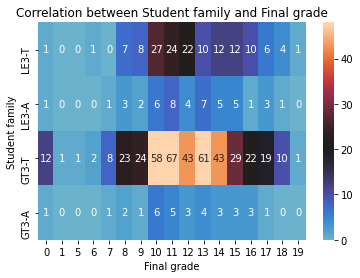

In [56]:
a=data.groupby(['G3','famsize','Pstatus']).count()
a=a.sex
a=a.unstack(level=0)
a=a.iloc[::-1]
a=a.fillna(0)
sns.heatmap(a,vmin=0,vmax=48,center=21,annot=True) #cmap="YlGnBu"
plt.title('Correlation between Student family and Final grade')
plt.ylabel('Student family')
plt.xlabel('Final grade')